**Predictive or condition-based Motor Maintenance (PdM)**

Is where machines are measured with objective machine monitored
trending methods such as, vibration analysis and infrared thermal imaging
PdM is a valuable tool since it doesn't require tearing a machine down to find out its condition PdM defines methods to predict or diagnose problems in a piece of equipment based on trending of test results.
These methods use non-intrusive testing techniques to measure and calculate performance trends for the equipment.

**Condition-based Maintenance (CBM)** is a methodology that combines predictive and preventive maintenance with real-time monitoring.

*PdM uses Condition-based Maintenance systems to detect fault sources well in advance of failure, making maintenance a proactive process*. *CBM accurately detects the current state of mechanical systems and predicts the systems’ ability to perform without failure.* It uses the potential failure levels created during the machinery design process, measures suitable parameters to quantify the existing failure levels, and adjusts the operating environment to make these levels compatible with economic production versus equipment lifetimes.

**Step 1: Install all libraries needed**

In [ ]:
! pip install numpy matplotlib scikit-learn seaborn

**Step 2: Executes the following code and please upload the file named data.csv, as the example attached**

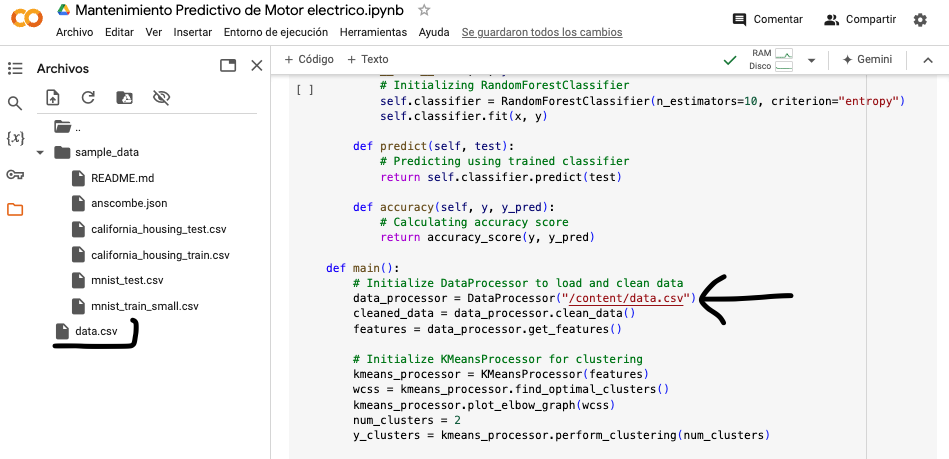

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

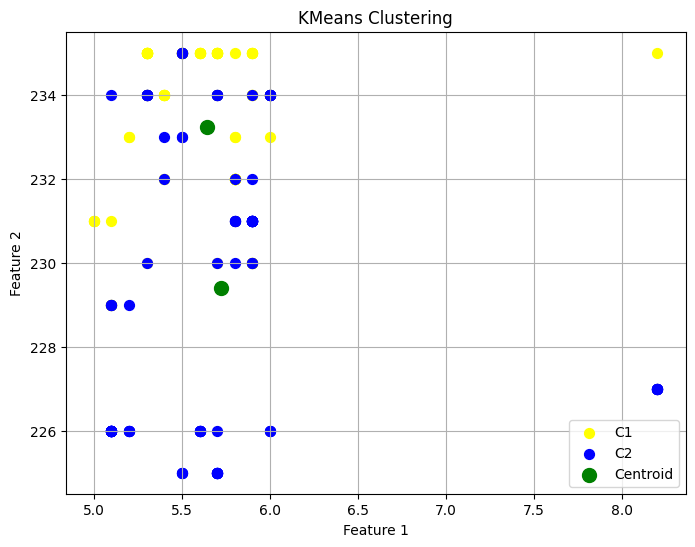

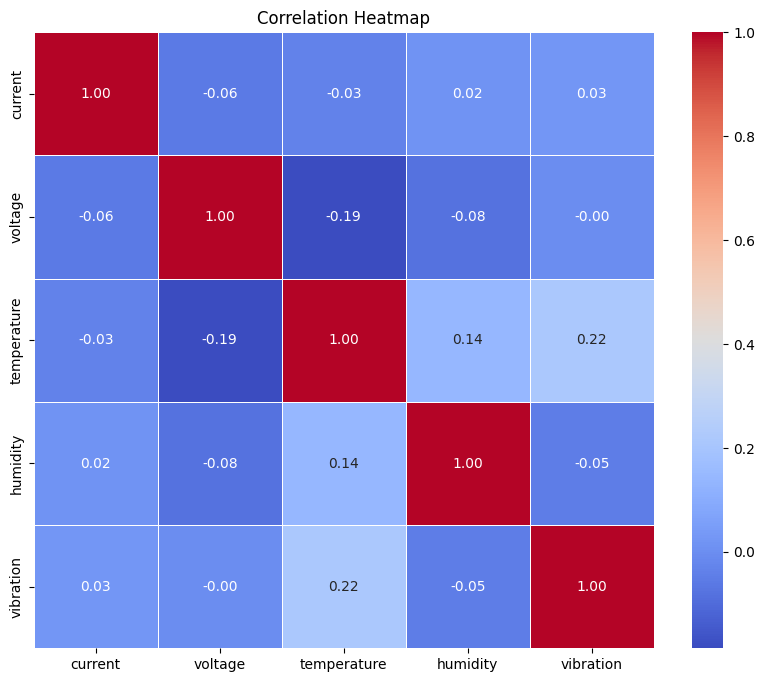

Prediction: [1]
Accuracy: 1.0
Your System Works


In [6]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Mount Google Drive if you're using Colab to access files
from google.colab import drive
drive.mount('/content/drive')

# Class for loading and cleaning data
class DataProcessor:
    def __init__(self, filename):
        self.df = pd.read_csv(filename)

    def clean_data(self):
        # Removing specific rows with null values
        self.df = self.df.drop([199, 200, 201, 202])
        return self.df

    def get_features(self):
        # Selecting specific columns as features
        return self.df.iloc[:, [0, 1, 2, 3, 4]].values

# Class for performing KMeans clustering
class KMeansProcessor:
    def __init__(self, data):
        self.data = data

    def find_optimal_clusters(self):
        wcss = []
        # Finding within-cluster sum of squares for different number of clusters
        for i in range(1, 11):
            kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
            kmeans.fit(self.data)
            wcss.append(kmeans.inertia_)
        return wcss

    def perform_clustering(self, num_clusters):
        # Performing KMeans clustering with specified number of clusters
        kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)
        self.kmeans_model = kmeans.fit(self.data)
        return self.kmeans_model.labels_

# Class for visualization operations
class Visualization:
    @staticmethod
    def scatter_plot(x, y, kmeans):
        # Scatter plot of clustered data points and centroids
        plt.figure(figsize=(8, 6))
        plt.scatter(x[y == 0, 0], x[y == 0, 1], s=50, c='yellow', label='C1')
        plt.scatter(x[y == 1, 0], x[y == 1, 1], s=50, c='blue', label='C2')
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='green', label='Centroid')
        plt.legend()
        plt.title('KMeans Clustering')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.grid(True)
        plt.show()

    @staticmethod
    def heatmap(df):
        # Heatmap visualization of correlation matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
        plt.title('Correlation Heatmap')
        plt.show()

# Class for RandomForestClassifier operations
class RandomForestProcessor:
    def __init__(self, x, y):
        # Initializing RandomForestClassifier
        self.classifier = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
        self.classifier.fit(x, y)

    def predict(self, test):
        # Predicting using trained classifier
        return self.classifier.predict(test)

    def accuracy(self, y, y_pred):
        # Calculating accuracy score
        return accuracy_score(y, y_pred)

def main():
    # Specify the path to your data file in Google Drive
    filename = '/content/data.csv'

    # Initialize DataProcessor to load and clean data
    data_processor = DataProcessor(filename)
    cleaned_data = data_processor.clean_data()
    features = data_processor.get_features()

    # Initialize KMeansProcessor for clustering
    kmeans_processor = KMeansProcessor(features)
    wcss = kmeans_processor.find_optimal_clusters()
    num_clusters = 2
    y_clusters = kmeans_processor.perform_clustering(num_clusters)

    # Visualize clustered data
    Visualization.scatter_plot(features, y_clusters, kmeans_processor.kmeans_model)

    # Visualize correlation heatmap of cleaned data
    Visualization.heatmap(cleaned_data)

    # Initialize RandomForestProcessor for classification
    random_forest = RandomForestProcessor(features, y_clusters)

    # Test data for prediction
    test_data = np.array([[5.1, 229, 65.23, 68, 0]])

    # Predict using RandomForestClassifier
    prediction = random_forest.predict(test_data)
    accuracy = random_forest.accuracy(y_clusters, random_forest.predict(features))
    print("Prediction:", prediction)
    print("Accuracy:", accuracy)

    # Function to predict based on classifier
    def give_pred(test):
        prediction = random_forest.predict(test)
        if prediction != 0:
            return 'Your System Works'
        return 'Your System Failed'

    # Test prediction function
    print(give_pred(test_data))

if __name__ == "__main__":
    main()



**Step 3: Interpretation:**


K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.

The objective of K-means is simple: **group similar data points together and discover underlying patterns**. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.



https://www.youtube.com/watch?v=4b5d3muPQmA

**What Is a Correlation Heatmap?**

A correlation heatmap is a graphical tool that displays the correlation between multiple variables as a color-coded matrix.

It’s like a color chart 🌈 that shows us how closely related different variables are.

In a correlation heatmap, each variable is represented by a row and a column, and the cells show the correlation between them.

The color of each cell represents the strength and direction of the correlation, with darker colors indicating stronger correlations.
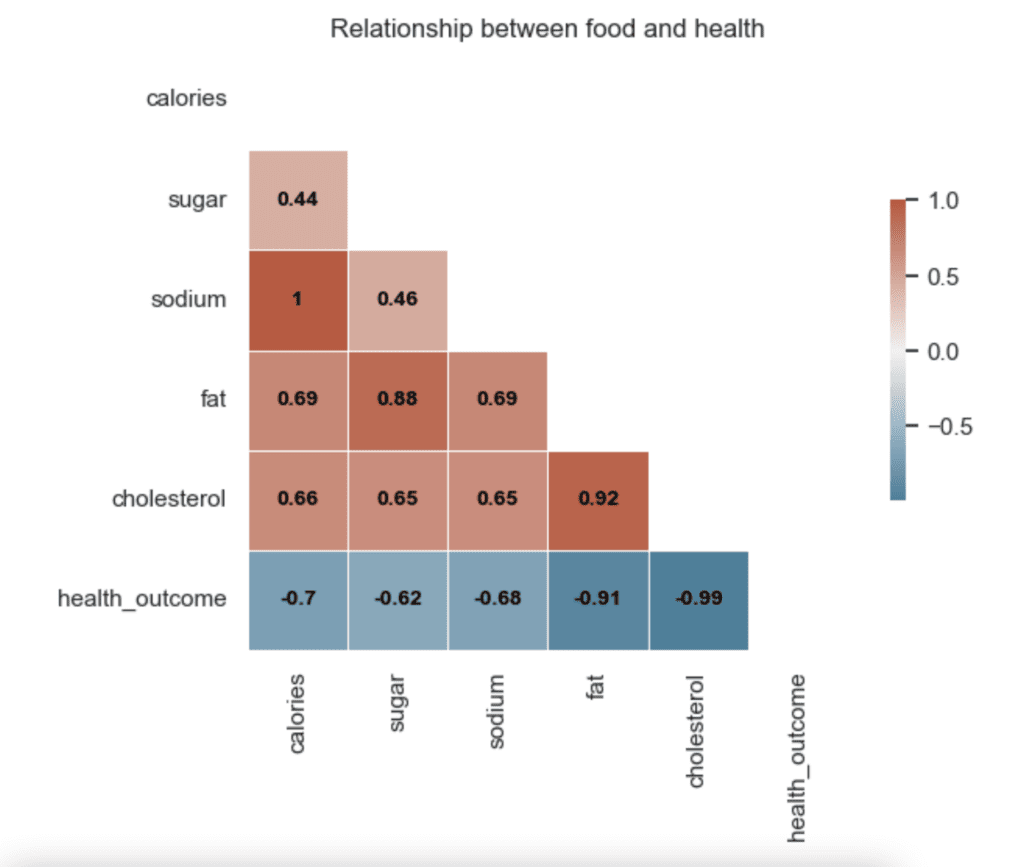




**How to Read a Correlation Heatmap?**

Look at the color of each cell to see the strength and direction of the correlation.
Darker colors indicate stronger correlations, while lighter colors indicate weaker correlations.
Positive correlations (when one variable increases, the other variable tends to increase) are usually represented by warm colors, such as red or orange.
Negative correlations (when one variable increases, the other variable tends to decrease) are usually represented by cool colors, such as blue or green.
📊 Understanding correlation heatmaps can help us identify patterns and relationships between multiple variables. So next time you analyze data with many variables, think like an artist and use a correlation heatmap to see the colors of the relationships! 🧐🎨

https://www.youtube.com/watch?v=-e_BYSTMye4